# PyTorch Computer Vision

### Resource Link : https://www.learnpytorch.io/03_pytorch_computer_vision/

1. torchvision - base domain library for computer vision with PyTorch
2. torchvision.datasets - get datasets and data loading functions for CV
3. torchvision.mmodels - get pretrained computer vision models 
4. torchvision.transforms - functions for manipulating vision data

In [1]:
import torch
from torch import nn
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Getting dataset

In [3]:
train_data = datasets.FashionMNIST(
                root = "data", #Where to download data to?
                train = True, #Do you want the training set?
                download = True, #Do you want to download?
                transform = torchvision.transforms.ToTensor(), #How to transform the data?
                target_transform = None #How to transform the target?
)

test_data = datasets.FashionMNIST(
                root = "data", #Where to download data to?
                train = False, #Do you want the training set?
                download = True, #Do you want to download?
                transform = torchvision.transforms.ToTensor(), #How to transform the data?
                target_transform = None #How to transform the target?
)

In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

## Check input and output shapes of data

In [8]:
image, label = train_data[0]
label

9

In [9]:
image.shape

torch.Size([1, 28, 28])

## Visualizing our data

In [10]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

Text(0.5, 1.0, '9')

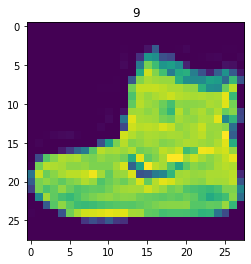

In [11]:
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

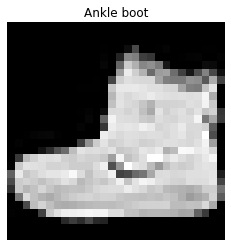

In [12]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

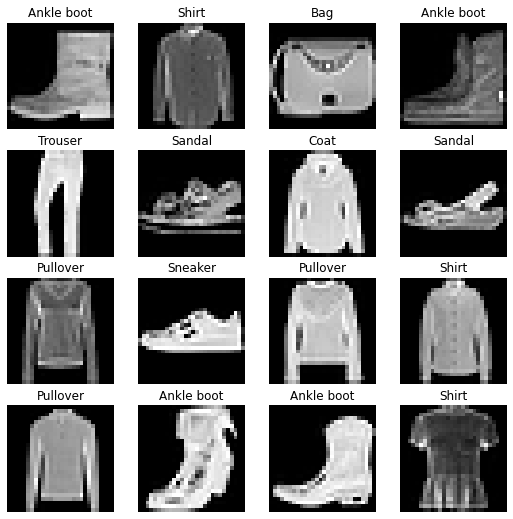

In [13]:
torch.manual_seed(42)
fig = plt.figure(figsize = (9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size = [1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap = "gray")
    plt.title(class_names[label])
    plt.axis(False)

In [14]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## Prepare DataLoader
Turns our data into batches or mini-batches for mini batch gradient descent
1. It is more computationally efficient, as computing hardware may not be able to look at 60k images in one hit
2. Gives Neural Network more chances to update gradients per epoch
3. Allows shuffling of data so that Neural Network does not end up learning the order of the images


In [15]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset = train_data, 
                              batch_size = 32,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = 32,
                             shuffle = False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x217691553a0>,
 <torch.utils.data.dataloader.DataLoader at 0x21769155250>)

In [16]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

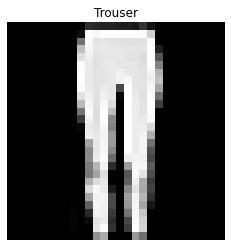

In [17]:
torch.manual_seed(5)

random_idx = torch.randint(0, len(train_features_batch), size = [1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap = "gray")
plt.title(class_names[label])
plt.axis(False)

## Building baseline model

In [18]:
flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x)

x.shape, output.shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [19]:
class FashionMNISTModel(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: 10):
        super().__init__()
        self.layer_stack = nn.Sequential(nn.Flatten(),
                                         nn.Linear(in_features = input_shape, out_features = hidden_units),
                                         nn.Linear(in_features = hidden_units, out_features = output_shape)
                                            )
    
    def forward(self, x):
        return self.layer_stack(x)

In [20]:
torch.manual_seed(42)
model_0 = FashionMNISTModel(input_shape = 784, hidden_units = 10, output_shape = len(class_names)).to("cpu")

model_0

FashionMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
from helper_functions import plot_predictions, plot_decision_boundary, accuracy_fn

In [22]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

In [23]:
from timeit import default_timer as timer
def print_train_time(start:float, end:float, device: torch.device = None):
    total_time = end - start
    print(total_time)

1. Loop thru epochs
2. Loop thru training batches and calculate metrics per batch
3. Loop thru testing batches and calculate metrics per batch
4. Time it all

In [24]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_start = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    train_loss = 0
    
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        y_pred = model_0(X)
        
        loss = loss_fn(y_pred, y)
        train_loss += loss
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch%400 == 0:
            print(f"Samples Trained: {batch*len(X)}")
            
    train_loss /= len(train_dataloader)
    
    test_loss, test_acc = 0, 0
    
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model_0(X_test)
            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim = 1))
            
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
        
    print(f"Train Loss : {train_loss}")
    print(f"Test Loss : {test_loss}")
    print(f"Test Accuracy : {test_acc}")
    
train_end = timer()

print_train_time(train_start, train_end, device = str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Samples Trained: 0
Samples Trained: 12800
Samples Trained: 25600
Samples Trained: 38400
Samples Trained: 51200
Train Loss : 0.5903893113136292
Test Loss : 0.5095351338386536
Test Accuracy : 82.03873801916933
Samples Trained: 0
Samples Trained: 12800
Samples Trained: 25600
Samples Trained: 38400
Samples Trained: 51200
Train Loss : 0.4763319194316864
Test Loss : 0.47989004850387573
Test Accuracy : 83.19688498402556
Samples Trained: 0
Samples Trained: 12800
Samples Trained: 25600
Samples Trained: 38400
Samples Trained: 51200
Train Loss : 0.4550332725048065
Test Loss : 0.4766390025615692
Test Accuracy : 83.42651757188499
79.0035833


## Make predictions and get model results

In [25]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim = 1))
            
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}


In [26]:
model_0_res = eval_model(model_0, test_dataloader, loss_fn, accuracy_fn, 'cpu')

model_0_res

{'model_name': 'FashionMNISTModel',
 'model_loss': 0.4766390025615692,
 'model_acc': 83.42651757188499}

In [27]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Creating model with linear and non linear layers

In [28]:
class FashionMNISTModel_V2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: 10):
        super().__init__()
        self.layer_stack = nn.Sequential(nn.Flatten(),
                                         nn.Linear(in_features = input_shape, out_features = hidden_units),
                                         nn.ReLU(),
                                         nn.Linear(in_features = hidden_units, out_features = output_shape),
                                         nn.ReLU()
                                            )
    
    def forward(self, x):
        return self.layer_stack(x)

In [29]:
torch.manual_seed(42)
model_2 = FashionMNISTModel_V2(input_shape = 784, hidden_units = 10, output_shape = len(class_names)).to(device)

model_2

FashionMNISTModel_V2(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [30]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.1)

## Functionizing training and test loops

In [31]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    
    train_loss, train_acc = 0, 0
    model.train()
    
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)
        
        y_pred = model(X)
        
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim = 1))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch%400 == 0:
            print(f"Samples Trained: {batch*len(X)}")
            
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    
    print(f"Train Loss: {train_loss:.5f}")
    print(f"Train Accuracy: {train_acc:.5f}")

In [32]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    
    test_loss, test_acc = 0, 0
    
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            test_pred = model(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true = y, y_pred = test_pred.argmax(dim = 1))
            
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        
        print(f"Test Loss: {test_loss:.5f}")
        print(f"Test Accuracy: {test_acc:.5f}")

In [33]:
torch.manual_seed(42)
train_start = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
    train_step(model_2, train_dataloader, loss_fn, optimizer, accuracy_fn, device)
    test_step(model_2, test_dataloader, loss_fn, accuracy_fn, device)
    
train_end = timer()

print_train_time(train_start, train_end, device = str(next(model_2.parameters()).device))

  0%|          | 0/5 [00:00<?, ?it/s]

Samples Trained: 0
Samples Trained: 12800
Samples Trained: 25600
Samples Trained: 38400
Samples Trained: 51200
Train Loss: 1.09199
Train Accuracy: 61.34333
Test Loss: 0.95636
Test Accuracy: 64.99601
Samples Trained: 0
Samples Trained: 12800
Samples Trained: 25600
Samples Trained: 38400
Samples Trained: 51200
Train Loss: 0.78101
Train Accuracy: 71.92833
Test Loss: 0.72227
Test Accuracy: 73.91174
Samples Trained: 0
Samples Trained: 12800
Samples Trained: 25600
Samples Trained: 38400
Samples Trained: 51200
Train Loss: 0.67027
Train Accuracy: 75.93667
Test Loss: 0.68500
Test Accuracy: 75.01997
Samples Trained: 0
Samples Trained: 12800
Samples Trained: 25600
Samples Trained: 38400
Samples Trained: 51200
Train Loss: 0.64384
Train Accuracy: 76.52333
Test Loss: 0.65079
Test Accuracy: 76.12819
Samples Trained: 0
Samples Trained: 12800
Samples Trained: 25600
Samples Trained: 38400
Samples Trained: 51200
Train Loss: 0.62892
Train Accuracy: 77.00167
Test Loss: 0.65277
Test Accuracy: 75.94848
180.5

In [34]:
model_2_res = eval_model(model_2, test_dataloader, loss_fn, accuracy_fn, device)
model_2_res

{'model_name': 'FashionMNISTModel_V2',
 'model_loss': 0.6527652740478516,
 'model_acc': 75.94848242811501}

## Creating a Convolutional Neural Network (CNN)

In [35]:
class FashionMNISTModel_V3(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: 10):
        super().__init__()
        self.conv_block_1 = nn.Sequential(nn.Conv2d(in_channels = input_shape, out_channels = hidden_units,
                                                    kernel_size = 3, stride = 1, padding = 1),
                                          nn.ReLU(),
                                          nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units,
                                                    kernel_size = 3, stride = 1, padding = 1),
                                          nn.ReLU(),
                                          nn.MaxPool2d(kernel_size = 2))
        self.conv_block_2 = nn.Sequential(nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units,
                                                    kernel_size = 3, stride = 1, padding = 1),
                                          nn.ReLU(),
                                          nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units,
                                                    kernel_size = 3, stride = 1, padding = 1),
                                          nn.ReLU(),
                                          nn.MaxPool2d(kernel_size = 2))
        self.classifier_stack = nn.Sequential(nn.Flatten(),
                                              nn.Linear(in_features = hidden_units*7*7, out_features = output_shape))
    
    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier_stack(x)
        return x

In [36]:
torch.manual_seed(42)
# input shape is the number of color channels
model_3 = FashionMNISTModel_V3(input_shape = 1, hidden_units = 10, output_shape = len(class_names)).to(device)

model_3

FashionMNISTModel_V3(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## Training and testing the CNN Model

In [37]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_3.parameters(), lr = 0.1)

In [38]:
torch.manual_seed(42)
train_start = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
    train_step(model_3, train_dataloader, loss_fn, optimizer, accuracy_fn, device)
    test_step(model_3, test_dataloader, loss_fn, accuracy_fn, device)
    
train_end = timer()

print_train_time(train_start, train_end, device = str(next(model_3.parameters()).device))

  0%|          | 0/5 [00:00<?, ?it/s]

Samples Trained: 0
Samples Trained: 12800
Samples Trained: 25600
Samples Trained: 38400
Samples Trained: 51200
Train Loss: 0.59570
Train Accuracy: 78.44167
Test Loss: 0.40620
Test Accuracy: 85.74281
Samples Trained: 0
Samples Trained: 12800
Samples Trained: 25600
Samples Trained: 38400
Samples Trained: 51200
Train Loss: 0.36139
Train Accuracy: 86.95667
Test Loss: 0.35243
Test Accuracy: 87.18051
Samples Trained: 0
Samples Trained: 12800
Samples Trained: 25600
Samples Trained: 38400
Samples Trained: 51200
Train Loss: 0.32339
Train Accuracy: 88.31167
Test Loss: 0.31441
Test Accuracy: 88.43850
Samples Trained: 0
Samples Trained: 12800
Samples Trained: 25600
Samples Trained: 38400
Samples Trained: 51200
Train Loss: 0.30212
Train Accuracy: 89.00500
Test Loss: 0.31373
Test Accuracy: 88.68810
Samples Trained: 0
Samples Trained: 12800
Samples Trained: 25600
Samples Trained: 38400
Samples Trained: 51200
Train Loss: 0.28890
Train Accuracy: 89.58667
Test Loss: 0.30164
Test Accuracy: 88.89776
208.7

In [39]:
model_3_res = eval_model(model_3, test_dataloader, loss_fn, accuracy_fn, device)
model_3_res

{'model_name': 'FashionMNISTModel_V3',
 'model_loss': 0.3016386330127716,
 'model_acc': 88.89776357827476}

## Compare model results and training time

In [40]:
compare_results = pd.DataFrame([model_0_res, model_2_res, model_3_res])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModel,0.476639,83.426518
1,FashionMNISTModel_V2,0.652765,75.948482
2,FashionMNISTModel_V3,0.301639,88.897764


In [41]:
compare_results["train_time"] = [81.99, 67.36, 67.10]

In [42]:
compare_results

,model_name,model_loss,model_acc,train_time
0,FashionMNISTModel,0.476639,83.426518,81.99
1,FashionMNISTModel_V2,0.652765,75.948482,67.36
2,FashionMNISTModel_V3,0.301639,88.897764,67.10


Text(0, 0.5, 'model')

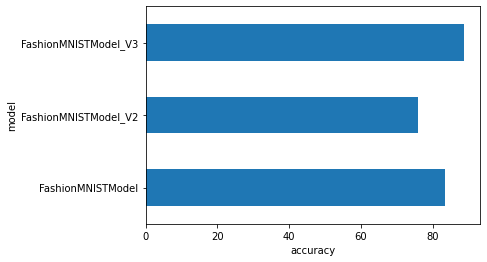

In [43]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy")
plt.ylabel("model")

## Evaluate random predictions with best model

In [44]:
def make_preds(model: torch.nn.Module,
               data: list,
               device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)
            
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)
            
            pred_probs.append(pred_prob.cpu())
            
    return torch.stack(pred_probs)

In [1]:
import random
# random.seed(5)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

NameError: name 'train_data' is not defined

In [46]:
pred_probs = make_preds(model_3, train_samples, device)

pred_classes = pred_probs.argmax(dim = 1)

pred_classes

tensor([6, 5, 4, 8, 6, 5, 6, 1, 9])

In [47]:
test_labels

[6, 5, 4, 8, 6, 5, 0, 1, 9]

## Plotting predictions

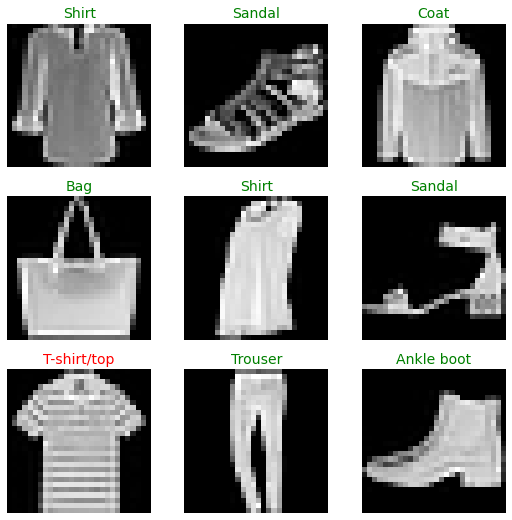

In [48]:
plt.figure(figsize = (9,9))
nrows, ncols = 3, 3

for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(sample.squeeze(), cmap="gray")
    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[test_labels[i]]
    
    if pred_label == truth_label:
        plt.title(pred_label, fontsize = 14, c='g')
    else:
        plt.title(truth_label, fontsize = 14, c='r')
        
    plt.axis(False)

## Confusion matrix evaluation

In [57]:
y_preds = []

model_3.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc = "Making predictions on test data"):
        X, y = X.to(device), y.to(device)
        
        y_logit = model_3(X)
        
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim = 1)
        
        y_preds.append(y_pred.cpu())
        
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions on test data:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 6, 6, 5, 7])

In [58]:
import mlxtend
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [59]:
confmat = ConfusionMatrix(num_classes = len(class_names), task = 'multiclass') #number of classes in dataset
confmat_tensor = confmat(preds = y_pred_tensor, target = test_data.targets)

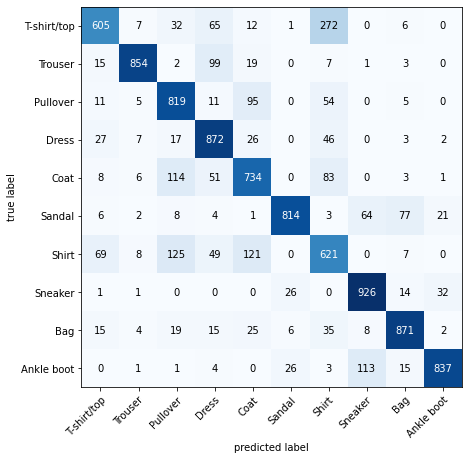

In [60]:
fig, ax = plot_confusion_matrix(
                    conf_mat = confmat_tensor.numpy(),
                    class_names = class_names,
                    figsize = (10,7))

## Saving the best model

In [61]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

MODEL_NAME = "03_MNIST_Fashion_CNN_Model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj = model_3.state_dict(), f = MODEL_SAVE_PATH)

### When loading a state dict, create an instance with the same input, hidden units and output states